# 📊 Data Workspace Notebook
# Author: David Linger
# Created: October 2025

"""
This notebook is part of the local data workspace environment.
It is designed for exploratory analysis, data cleaning, and model development.

Environment:
- Python 3.14(local install)
- Virtual Environment: data_env
- Kernel: Python (data_env)

Tools & Libraries:
- pandas, numpy, matplotlib, seaborn
- scikit-learn, ipykernel, jupyter

Version Control:
- Managed via Git (local repo)

Notes:
- All paths are local (no cloud sync)
- Virtual environment is excluded from version control via .gitignore
- For reproducibility, install dependencies via requirements.txt

"""


In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import yfinance as yf
import ta
from datetime import datetime, timedelta
import matplotlib.pyplot as plt


To start off the dataset we are going to be looking at a small subset of the stock market and will be focussing on ETF's by producing a 5-ticker set for a diversified preliminary dataset that will provide broad exposure to large-cap U.S. equities across different industries. 

1. SPY – SPDR S&P 500 ETF
- Tracks: S&P 500 Index (500 large U.S. companies)
- Focus: Broad U.S. market exposure
- Top Holdings: Apple, Microsoft, Amazon
- Use Case: Core equity benchmark

2. QQQ – Invesco Nasdaq-100 ETF
- Tracks: Nasdaq-100 Index (100 largest non-financial U.S. companies)
- Focus: Tech-heavy growth stocks
- Top Holdings: NVIDIA, Apple, Meta, Google
- Use Case: High-growth, innovation-focused exposure

3. DIA – SPDR Dow Jones Industrial Average ETF
- Tracks: Dow Jones Industrial Average (30 blue-chip companies)
- Focus: Stable, mature U.S. companies
- Top Holdings: UnitedHealth, Goldman Sachs, Boeing
- Use Case: Defensive, value-oriented investing

4. TLT – iShares 20+ Year Treasury Bond ETF
- Tracks: Long-term U.S. Treasury bonds
- Focus: Fixed income, interest rate sensitivity
- Top Holdings: U.S. government bonds
- Use Case: Hedge against equity risk, macro exposure

5. VXUS – Vanguard Total International Stock ETF
- Tracks: Global stocks outside the U.S.
- Focus: International diversification
- Top Holdings: Nestlé, Samsung, Toyota
- Use Case: Exposure to developed and emerging markets

ETF(Exchange-Traded Fund) - is a type of investment fund that can be bought and sold just like a regular stock on a stock exchange. But instead of representing one company, an ETF holds a conjunction of assets, such as stocks, bonds, commodities, or currencies.

Candle Granularity

For the purposes of pensionfund trading were going to be focussing on: 
- end-of-day trading; a model that will be optimized for buy/sell once a day after market close.
- Swing trading; Holding positions for several days to weeks.
- Portfolio rotation:; Rebalance weekly or monthly based on daily signals.

In [2]:
# fetch the tables for the ETFs

ETFS = ["SPY", "QQQ", "DIA", "TLT", "VXUS"]
leadup_days = 50
start_date = (datetime.strptime("2023-01-01", "%Y-%m-%d") - timedelta(days=leadup_days)).strftime("%Y-%m-%d")
df_etf = yf.download(ETFS, interval="1d", start=start_date, end="2025-01-01", group_by="ticker")


C:\Users\david.linger\AppData\Local\Temp\ipykernel_21128\2073411988.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_etf = yf.download(ETFS, interval="1d", start=start_date, end="2025-01-01", group_by="ticker")
[*********************100%***********************]  5 of 5 completed


In [3]:
df_etf

Ticker            TLT                                                    QQQ  \
Price            Open       High        Low      Close    Volume        Open   
Date                                                                           
2022-11-14  87.562702  87.634242  86.829354  87.330177  13741100  280.487529   
2022-11-15  87.866767  88.805804  87.741563  88.743202  26608200  286.718150   
2022-11-16  89.449712  90.728588  89.199304  90.683876  28507700  281.988803   
2022-11-17  89.610709  89.941609  89.235097  89.726974  24528900  275.601113   
2022-11-18  89.968423  90.227776  89.029393  89.109879  14941300  282.479412   
...               ...        ...        ...        ...       ...         ...   
2024-12-24  84.257619  85.080446  84.199540  85.061089  22377600  522.854515   
2024-12-26  84.422202  85.148227  84.412520  85.012703  19981800  526.331417   
2024-12-27  84.683585  84.973990  84.277005  84.315727  27262300  524.030044   
2024-12-30  85.022379  85.225665  84.867490  84.993340  48519600  513.569590   
2024-12-31  85.312783  85.457989  84.470599  84.538361  31917300  514.954366   

Ticker                                                    ...         SPY  \
Price             High         Low       Close    Volume  ...        Open   
Date                                                      ...               
2022-11-14  283.774575  279.094233  280.075439  55290700  ...  380.674111   
2022-11-15  287.748434  280.595435  283.951172  73985400  ...  384.983161   
2022-11-16  284.039520  279.251230  280.075439  48859800  ...  380.789387   
2022-11-17  280.938875  275.444116  279.457245  55462100  ...  374.723963   
2022-11-18  282.577508  277.014087  279.467102  53588600  ...  381.710626   
...                ...         ...         ...       ...  ...         ...   
2024-12-24  528.054837  522.216909  527.965210  17558200  ...  590.882491   
2024-12-26  529.240409  524.328973  527.606567  19090500  ...  594.292594   
2024-12-27  524.468390  515.910697  520.593018  33839600  ...  592.349545   
2024-12-30  517.405074  509.903419  513.669189  34584000  ...  582.783445   
2024-12-31  515.711454  508.339345  509.305695  29117000  ...  584.785824   

Ticker                                                           DIA  \
Price             High         Low       Close    Volume        Open   
Date                                                                   
2022-11-14  384.052240  378.917846  379.196167  71903500  319.323624   
2022-11-15  386.096415  378.591564  382.430359  93194500  321.011603   
2022-11-16  381.749086  378.879596  379.513000  68508500  318.337305   
2022-11-17  379.033031  374.416882  378.351624  74496300  315.549105   
2022-11-18  381.777812  377.200059  380.069550  92922500  320.684674   
...                ...         ...         ...       ...         ...   
2024-12-24  596.116657  590.297589  596.076965  33160100  423.748295   
2024-12-26  597.246690  592.884946  596.116638  41219100  425.803343   
2024-12-27  592.587511  585.628470  589.841553  64969300  425.418004   
2024-12-30  586.599978  579.333632  583.110535  56578800  420.369319   
2024-12-31  585.509524  579.343521  580.989136  57052700  421.792026   

Ticker                                                   
Price             High         Low       Close   Volume  
Date                                                     
2022-11-14  322.320457  318.233011  318.432159  3303300  
2022-11-15  322.557440  316.203421  318.849335  4824100  
2022-11-16  319.835707  318.223477  318.716644  3085500  
2022-11-17  319.389967  315.549105  318.745087  3606500  
2022-11-18  321.340376  318.594055  320.599152  3659100  
...                ...         ...         ...      ...  
2024-12-24  427.443449  423.145592  427.315002  1431700  
2024-12-26  428.470987  425.753955  428.016479  1867400  
2024-12-27  427.107526  422.305774  424.844971  2429100  
2024-12-30  422.533067  417.454673  420.665710  3858300  
2024-12-31  422.612062  418.956437  4

In [4]:
# Reset column index
df_flat = df_etf.stack(level=0).reset_index()

# Rename columns for clarity
df_flat.columns = ["Date", "Ticker", "Open", "High", "Low", "Close", "Volume"]

C:\Users\david.linger\AppData\Local\Temp\ipykernel_21128\3083213905.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_flat = df_etf.stack(level=0).reset_index()


In [5]:
df_flat

,Date,Ticker,Open,High,Low,Close,Volume
0,2022-11-14,DIA,319.323624,322.320457,318.233011,318.432159,3303300
1,2022-11-14,QQQ,280.487529,283.774575,279.094233,280.075439,55290700
2,2022-11-14,SPY,380.674111,384.052240,378.917846,379.196167,71903500
3,2022-11-14,TLT,87.562702,87.634242,86.829354,87.330177,13741100
4,2022-11-14,VXUS,47.130042,47.430583,47.038971,47.057182,4871300
...,...,...,...,...,...,...,...
2670,2024-12-31,DIA,421.792026,422.612062,418.956437,420.398926,2442700
2671,2024-12-31,QQQ,514.954366,515.711454,508.339345,509.305695,29117000
2672,2024-12-31,SPY,584.785824,585.509524,579.343521,580.989136,57052700
2673,2024-12-31,TLT,85.312783,85.457989,84.470599,84.538361,31917300


In [6]:
def add_indicators(df):
    df = df.copy()

    # Momentum - Detect overbought/oversold conditions
    df["RSI"] = ta.momentum.RSIIndicator(close=df["Close"]).rsi()
    df["StochRSI"] = ta.momentum.StochRSIIndicator(close=df["Close"]).stochrsi()

    # Trend - Identify direction and momentum
    macd = ta.trend.MACD(close=df["Close"], window_fast=12, window_slow=26, window_sign=9)
    df["MACD"] = macd.macd()
    df["MACD_signal"] = macd.macd_signal()
    df["MACD_diff"] = macd.macd_diff()

    df["SMA_20"] = ta.trend.SMAIndicator(close=df["Close"], window=20).sma_indicator()
    df["EMA_20"] = ta.trend.EMAIndicator(close=df["Close"], window=20).ema_indicator()
    df["SMA_50"] = ta.trend.SMAIndicator(close=df["Close"], window=50).sma_indicator()
    df["EMA_50"] = ta.trend.EMAIndicator(close=df["Close"], window=50).ema_indicator()

    # Volatility - Gauge price fluctuation and breakout potential
    bb = ta.volatility.BollingerBands(close=df["Close"], window=20, window_dev=2)
    df["BB_high"] = bb.bollinger_hband()
    df["BB_low"] = bb.bollinger_lband()
    df["BB_width"] = df["BB_high"] - df["BB_low"]

    # Average True Range (ATR) - measures market volatility
    df["ATR"] = ta.volatility.AverageTrueRange(
        high=df["High"], 
        low=df["Low"], 
        close=df["Close"], 
        window=14
    ).average_true_range()

    # Volume - Confirm price moves with volume strength
    df["OBV"] = ta.volume.OnBalanceVolumeIndicator(
        close=df["Close"], 
        volume=df["Volume"]
    ).on_balance_volume()

    # Chaikin Money Flow (CMF) - measures accumulation/distribution pressure
    df["CMF"] = ta.volume.ChaikinMoneyFlowIndicator(
        high=df["High"], 
        low=df["Low"], 
        close=df["Close"], 
        volume=df["Volume"], 
        window=20
    ).chaikin_money_flow()

    return df
    


In [7]:
def add_indicators_fast(df):
    df = df.sort_values(["Ticker", "Date"]).copy()

    # Momentum Indicators
    df["RSI"] = df.groupby("Ticker")["Close"].transform(
        lambda x: ta.momentum.RSIIndicator(close=x).rsi()
    )
    df["StochRSI"] = df.groupby("Ticker")["Close"].transform(
        lambda x: ta.momentum.StochRSIIndicator(close=x).stochrsi()
    )

    # MACD (Trend)
    def macd_group(g):
        macd = ta.trend.MACD(close=g["Close"])
        g["MACD"] = macd.macd()
        g["MACD_signal"] = macd.macd_signal()
        g["MACD_diff"] = macd.macd_diff()
        return g

    df = df.groupby("Ticker", group_keys=False).apply(macd_group)

    # Moving Averages
    for window in [20, 50]:
        df[f"SMA_{window}"] = df.groupby("Ticker")["Close"].transform(
            lambda x: ta.trend.SMAIndicator(close=x, window=window).sma_indicator()
        )
        df[f"EMA_{window}"] = df.groupby("Ticker")["Close"].transform(
            lambda x: ta.trend.EMAIndicator(close=x, window=window).ema_indicator()
        )

    # Bollinger Bands
    def bollinger_group(g):
        bb = ta.volatility.BollingerBands(close=g["Close"], window=20, window_dev=2)
        g["BB_high"] = bb.bollinger_hband()
        g["BB_low"] = bb.bollinger_lband()
        g["BB_width"] = g["BB_high"] - g["BB_low"]
        return g

    df = df.groupby("Ticker", group_keys=False).apply(bollinger_group)

    # ATR
    def atr_group(g):
        atr = ta.volatility.AverageTrueRange(
            high=g["High"], low=g["Low"], close=g["Close"], window=14
        )
        g["ATR"] = atr.average_true_range()
        return g

    df = df.groupby("Ticker", group_keys=False).apply(atr_group)

    # OBV
    def obv_group(g):
        obv = ta.volume.OnBalanceVolumeIndicator(close=g["Close"], volume=g["Volume"])
        g["OBV"] = obv.on_balance_volume()
        g["OBV_prev"] = g["OBV"].shift(1)
        return g

    df = df.groupby("Ticker", group_keys=False).apply(obv_group)

    # CMF
    def cmf_group(g):
        cmf = ta.volume.ChaikinMoneyFlowIndicator(
            high=g["High"], low=g["Low"], close=g["Close"], volume=g["Volume"], window=20
        )
        g["CMF"] = cmf.chaikin_money_flow()
        return g

    df = df.groupby("Ticker", group_keys=False).apply(cmf_group)

    return df


In [8]:
df_working = add_indicators_fast(df_flat).dropna().copy()

df_working.groupby("Ticker").head(5)


C:\Users\david.linger\AppData\Local\Temp\ipykernel_21128\789926080.py:20: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("Ticker", group_keys=False).apply(macd_group)
C:\Users\david.linger\AppData\Local\Temp\ipykernel_21128\789926080.py:39: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("Ticker", group_keys=False).apply(bollinger_group)
C:\Users\david.linger\AppData\Local\Temp\ipykernel_

,Date,Ticker,Open,High,Low,Close,Volume,RSI,StochRSI,MACD,...,EMA_20,SMA_50,EMA_50,BB_high,BB_low,BB_width,ATR,OBV,OBV_prev,CMF
245,2023-01-26,DIA,322.625098,323.587853,320.480301,323.492523,2930900,56.216905,0.666120,0.749849,...,320.070775,319.988732,319.568454,327.175642,311.562713,15.612929,4.387274,17238600,14307700.0,0.233536
250,2023-01-27,DIA,323.530723,325.570677,322.348711,323.730896,2907400,56.569311,0.684433,0.942948,...,320.419358,320.094707,319.731687,327.346338,312.470929,14.875409,4.304038,20146000,17238600.0,0.270040
255,2023-01-30,DIA,322.634675,324.512565,321.099967,321.300140,3032700,51.975195,0.445694,0.889583,...,320.503242,320.143723,319.793195,327.426659,312.894038,14.532622,4.240363,17113300,20146000.0,0.218881
260,2023-01-31,DIA,321.814903,324.922456,320.775871,324.893860,2593500,57.473942,0.731443,1.124314,...,320.921396,320.267267,319.993221,327.851325,313.401711,14.449614,4.233665,19706800,17113300.0,0.207240
265,2023-02-01,DIA,323.263862,327.219815,319.889372,324.932037,6175400,57.529575,0.734334,1.298453,...,321.303362,320.391006,320.186900,328.148400,314.051280,14.097120,4.454863,25882200,19706800.0,0.229023
246,2023-01-26,QQQ,286.430860,288.693024,283.775249,288.515991,51596300,67.042422,1.000000,3.635251,...,275.348409,274.374732,274.477272,289.871198,252.068553,37.802645,5.750439,-2413700,-54010000.0,0.302198
251,2023-01-27,QQQ,287.198017,293.355080,287.079995,291.387970,56441900,69.186049,1.000000,4.421445,...,276.875986,274.600983,275.140437,292.295599,253.200684,39.094915,5.787913,54028200,-2413700.0,0.364654
256,2023-01-30,QQQ,288.112750,289.538917,285.122765,285.496490,49405800,60.493793,0.541675,4.517047,...,277.696987,274.631889,275.546556,293.573529,254.266571,39.306958,5.822006,4622400,54028200.0,0.290045
261,2023-01-31,QQQ,285.535844,289.873325,285.427667,289.774963,46705100,64.028264,0.724101,4.881776,...,278.847270,274.825880,276.104533,295.310590,255.316909,39.993681,5.723695,51327500,4622400.0,0.296909
266,2023-02-01,QQQ,289.568422,298.440077,287.493105,295.971375,67562200,68.433078,0.959722,5.606199,...,280.478137,275.156162,276.883625,297.752092,256.459487,41.292605,6.096786,118889700,51327500.0,0.344647


Some breakdowns of the Technical Indicators from the book: Technical Analysis from A to Z by Steven B. Achelis

### Momentum 
- RSI (Relative strength index): Welles Wilder, New Concepts in Technical Trading
Systems(1978)

"Popular oscilator for comparing the internal strength of a single 'security'. Price following oscilator that ranges between 0 to 100. A popular method of analyzing the RSI is to look for a divergence in which the security is making a new high, but the RSI is failing to surpass its previous high. This divergence is an indication of an impending reversal. When the RSI then turns down and falls below its most recent trough, it is said to have completed a "failure swing." The failure swing is considered a confirmation of the impending reversal."

- StochRSI The StochRSI oscillator was developed to take advantage of both momentum indicators in order to create a more sensitive indicator that is attuned to a specific security’s historical performance rather than a generalized analysis of price change.
 


### Trend
- MACD

"The MACD is the difference between a 26-day and 12-day exponential moving average. A 9-day exponential moving average, called the "signal" (or "trigger") line is plotted on top of the MACD to show buy/sell opportunities."

There are three main ways to deploy the MACD; Crossover, Overbought/Oversold Conditions and Divergences. 

1.  Crossover: the general rule to follow is that when the MACD falls below the signal line the asset should be sold, conversely when it is above the signal line the asset should be bought. Additionally when the signal rises or falls above/below zero, it is also common practice to buy or sell relative to it's position.

2. Overbought/Oversold: The MACD can also indicate this attributem when the shorter moving average dramatically pulls away from the longer moving average this is a strong indicator that the asset price is overextending and soon will have to move back to more realistic levels. Since these conditions vary from stock to stock we won't be using this, as we're trying to generalize across market regimes and industries for various stocks at once. 

3.  Divergences: an indication that an end of a trend may be near occurs when the MACD diverges from the asset. A "bearish" divergence is when the MACD is going into new lows whilst the prices fail to reach those lows, A "bullish" divergence is when the MACD is making new highs whilst prices fail to rech new highs. both of these are most significant when overbought/oversold levals are high.

- SMA

"A simple, or arithmetic, moving average is calculated by adding the closing price of the security for a number of time periods (e.g., 12 days) and then dividing this total by the number of time periods. The result is the average price of the security over the time period. Simple moving averages give equal weight to each daily price."

The average is calculated by simply aggregating the closing prices of the stock for each candle at closing time, and dividing it by the number of candles within that timeframe. Since the SMA gives equal weight to all prices in the window, it is slower to react to price changes but better in identifying long-term trends. 

- EMA

"An exponential (or exponentially weighted) moving average is calculated by applying a percentage of today's closing price to yesterday's moving average value. Exponential moving averages place more weight on recent prices."

### Volatility

Bollinger Bands (BB)
Developed by John Bollinger in the 1980s, Bollinger Bands are envelopes (or bands) plotted at a standard deviation level above and below a moving average of price. Since the distance of the bands is based on standard deviation, they expand and contract as volatility increases or decreases.

A common interpretation is that prices tend to revert to the mean, so when the price touches or breaks above the upper band, the market is considered overbought; conversely, when the price touches or breaks below the lower band, the market may be oversold. Bollinger Bands are not designed to generate standalone buy or sell signals but rather to provide a relative definition of high and low prices.

The "squeeze" — a narrowing of the bands — often precedes a significant price movement, while a "band expansion" signals increased volatility and the potential continuation of a trend.

ATR (Average True Range)
The Average True Range, introduced by J. Welles Wilder in New Concepts in Technical Trading Systems (1978), measures market volatility by decomposing the entire range of an asset price for a given period. Unlike other volatility measures, ATR does not indicate direction (bullish or bearish) — it simply quantifies the degree of price movement.

ATR is calculated as the moving average of the True Range (TR), where TR is the greatest of the following:

Current high minus current low,

The absolute value of the current high minus the previous close, and

The absolute value of the current low minus the previous close.

A higher ATR value indicates greater volatility (wider price swings), while a lower ATR reflects calmer markets. Traders use ATR to set stop-loss levels and gauge the likelihood of breakout events.

### Volume

OBV (On-Balance Volume)
Developed by Joseph Granville in 1963, On-Balance Volume (OBV) measures buying and selling pressure as a cumulative indicator that adds volume on up days and subtracts volume on down days. The basic idea is that volume precedes price movement — if a security is seeing increasing OBV while price remains stable, the rising volume may foreshadow a price breakout.

Granville believed that when OBV increases sharply without a corresponding increase in price, prices will eventually rise to confirm the higher OBV, and vice versa. Divergences between OBV and price are often seen as early warnings of potential trend reversals.

CMF (Chaikin Money Flow)
The Chaikin Money Flow, developed by Marc Chaikin, quantifies the amount of Money Flow Volume over a specific period (commonly 20 days). It combines price and volume to show whether money is flowing into or out of a security.

CMF is based on the principle that accumulation (buying pressure) tends to occur when prices close near the high of the range with increasing volume, while distribution (selling pressure) occurs when prices close near the low with increasing volume.

Values range between -1 and +1.

A positive CMF suggests accumulation (bullish sentiment).

A negative CMF suggests distribution (bearish sentiment).

Divergences between CMF and price action can indicate weakening trends or reversals.

In [9]:
# Download ^IRX (13-week Treasury Bill rate)
rf = yf.download("^IRX", start=start_date, end="2025-01-01", interval="1d")

C:\Users\david.linger\AppData\Local\Temp\ipykernel_21128\2467893804.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  rf = yf.download("^IRX", start=start_date, end="2025-01-01", interval="1d")
[*********************100%***********************]  1 of 1 completed


In [10]:
# Reset column index
rf_flat = rf.stack(level=1, future_stack=True).reset_index()

# Name columns for clarity
rf_flat.columns = ["Date", "Ticker", "Open", "High", "Low", "Close", "Volume"]

# Drop unnessecary columns (Only need Date and Close)
rf_new = rf_flat.drop(columns=["Ticker", "Open", "High", "Low", "Volume"])

# rename and convert Risk-free rate
rf_new.columns = ["Date", "RiskFreeRate"]
rf_new["RiskFreeRate"] = rf_new["RiskFreeRate"] / 100  # Convert % to decimal

rf_new


,Date,RiskFreeRate
0,2022-11-14,0.04078
1,2022-11-15,0.04125
2,2022-11-16,0.04120
3,2022-11-17,0.04128
4,2022-11-18,0.04123
...,...,...
530,2024-12-24,0.04220
531,2024-12-26,0.04210
532,2024-12-27,0.04203
533,2024-12-30,0.04178


In [11]:
df_working["Date"] = pd.to_datetime(df_working["Date"])
rf_new["Date"] = pd.to_datetime(rf_new["Date"])

df_merged = df_working.merge(rf_new, on="Date", how="left")
# df_merged["RiskFreeRate"].fillna(method="ffill", inplace=True)


In [12]:
df_working = df_merged.dropna().copy()
df_working.groupby("Ticker").head(5)

,Date,Ticker,Open,High,Low,Close,Volume,RSI,StochRSI,MACD,...,SMA_50,EMA_50,BB_high,BB_low,BB_width,ATR,OBV,OBV_prev,CMF,RiskFreeRate
0,2023-01-26,DIA,322.625098,323.587853,320.480301,323.492523,2930900,56.216905,0.666120,0.749849,...,319.988732,319.568454,327.175642,311.562713,15.612929,4.387274,17238600,14307700.0,0.233536,0.04540
1,2023-01-27,DIA,323.530723,325.570677,322.348711,323.730896,2907400,56.569311,0.684433,0.942948,...,320.094707,319.731687,327.346338,312.470929,14.875409,4.304038,20146000,17238600.0,0.270040,0.04538
2,2023-01-30,DIA,322.634675,324.512565,321.099967,321.300140,3032700,51.975195,0.445694,0.889583,...,320.143723,319.793195,327.426659,312.894038,14.532622,4.240363,17113300,20146000.0,0.218881,0.04545
3,2023-01-31,DIA,321.814903,324.922456,320.775871,324.893860,2593500,57.473942,0.731443,1.124314,...,320.267267,319.993221,327.851325,313.401711,14.449614,4.233665,19706800,17113300.0,0.207240,0.04580
4,2023-02-01,DIA,323.263862,327.219815,319.889372,324.932037,6175400,57.529575,0.734334,1.298453,...,320.391006,320.186900,328.148400,314.051280,14.097120,4.454863,25882200,19706800.0,0.229023,0.04560
486,2023-01-26,QQQ,286.430860,288.693024,283.775249,288.515991,51596300,67.042422,1.000000,3.635251,...,274.374732,274.477272,289.871198,252.068553,37.802645,5.750439,-2413700,-54010000.0,0.302198,0.04540
487,2023-01-27,QQQ,287.198017,293.355080,287.079995,291.387970,56441900,69.186049,1.000000,4.421445,...,274.600983,275.140437,292.295599,253.200684,39.094915,5.787913,54028200,-2413700.0,0.364654,0.04538
488,2023-01-30,QQQ,288.112750,289.538917,285.122765,285.496490,49405800,60.493793,0.541675,4.517047,...,274.631889,275.546556,293.573529,254.266571,39.306958,5.822006,4622400,54028200.0,0.290045,0.04545
489,2023-01-31,QQQ,285.535844,289.873325,285.427667,289.774963,46705100,64.028264,0.724101,4.881776,...,274.825880,276.104533,295.310590,255.316909,39.993681,5.723695,51327500,4622400.0,0.296909,0.04580
490,2023-02-01,QQQ,289.568422,298.440077,287.493105,295.971375,67562200,68.433078,0.959722,5.606199,...,275.156162,276.883625,297.752092,256.459487,41.292605,6.096786,118889700,51327500.0,0.344647,0.04560


In [13]:
# Compute daily returns
df_working.loc[:, "Return"] = (
    df_working
    .groupby("Ticker")["Close"]
    .pct_change()
)

df_working = df_working.dropna().copy()
df_working

,Date,Ticker,Open,High,Low,Close,Volume,RSI,StochRSI,MACD,...,EMA_50,BB_high,BB_low,BB_width,ATR,OBV,OBV_prev,CMF,RiskFreeRate,Return
1,2023-01-27,DIA,323.530723,325.570677,322.348711,323.730896,2907400,56.569311,0.684433,0.942948,...,319.731687,327.346338,312.470929,14.875409,4.304038,20146000,17238600.0,0.270040,0.04538,0.000737
2,2023-01-30,DIA,322.634675,324.512565,321.099967,321.300140,3032700,51.975195,0.445694,0.889583,...,319.793195,327.426659,312.894038,14.532622,4.240363,17113300,20146000.0,0.218881,0.04545,-0.007509
3,2023-01-31,DIA,321.814903,324.922456,320.775871,324.893860,2593500,57.473942,0.731443,1.124314,...,319.993221,327.851325,313.401711,14.449614,4.233665,19706800,17113300.0,0.207240,0.04580,0.011185
4,2023-02-01,DIA,323.263862,327.219815,319.889372,324.932037,6175400,57.529575,0.734334,1.298453,...,320.186900,328.148400,314.051280,14.097120,4.454863,25882200,19706800.0,0.229023,0.04560,0.000118
5,2023-02-02,DIA,325.542062,325.542062,322.205711,324.512543,5169400,56.652572,0.688760,1.386626,...,320.356533,328.388342,314.588382,13.799960,4.374970,20712800,25882200.0,0.239276,0.04513,-0.001291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425,2024-12-24,VXUS,58.599468,58.599468,58.264558,58.520664,11058600,40.359674,0.288571,-0.417537,...,59.681516,61.250550,57.685798,3.564751,0.562758,159362000,148303400.0,-0.025765,0.04220,0.003208
2426,2024-12-26,VXUS,58.579767,58.737372,58.461561,58.638866,2977800,41.969624,0.344397,-0.407694,...,59.640628,61.257455,57.654428,3.603026,0.542262,162339800,159362000.0,-0.011414,0.04210,0.002020
2427,2024-12-27,VXUS,58.441867,58.619169,58.313812,58.510818,2758800,40.688258,0.299965,-0.405551,...,59.596322,61.268343,57.580122,3.688221,0.526747,159581000,162339800.0,-0.001188,0.04203,-0.002184
2428,2024-12-30,VXUS,58.136503,58.353211,57.909947,58.116802,4583800,36.949926,0.206661,-0.430682,...,59.538301,61.263355,57.420306,3.843049,0.532042,154997200,159581000.0,-0.022134,0.04178,-0.006734


# Rules

In [14]:
# Vectorized rule base
bullish = (
    ((df_working["RSI"] < 30) | (df_working["StochRSI"] < 0.2)).astype(int) +
    2 * ((df_working["MACD"] > df_working["MACD_signal"]).astype(int)) +
    # ((df_working["SMA_20"] > df_working["SMA_50"]).astype(int)) +
    ((df_working["EMA_20"] > df_working["EMA_50"]).astype(int)) +
    ((df_working["Close"] < df_working["BB_low"]).astype(int)) +
    ((df_working["CMF"] > 0) | (df_working["OBV"] > df_working["OBV_prev"])).astype(int)
)

bearish = (
    ((df_working["RSI"] > 70) | (df_working["StochRSI"] > 0.8)).astype(int) +
    2 * ((df_working["MACD"] < df_working["MACD_signal"]).astype(int)) +
    # ((df_working["SMA_20"] < df_working["SMA_50"]).astype(int)) +
    ((df_working["EMA_20"] < df_working["EMA_50"]).astype(int)) +
    ((df_working["Close"] > df_working["BB_high"]).astype(int)) +
    ((df_working["CMF"] < 0) | (df_working["OBV"] < df_working["OBV_prev"])).astype(int)
)

df_working["Label"] = np.select(
    [bullish > bearish, bearish > bullish],
    [1, -1],
    default=0
)

df_working["bullish_score"] = bullish
df_working["bearish_score"] = bearish





The labeling strategy is derived from classical technical analysis indicators. 
- The thresholds for momentum-based conditions (e.g., RSI < 30 for oversold) follow the conventions introduced by Wilder (1978). 
- Trend confirmation is obtained via MACD crossovers as formulated by Appel (1979)
- Volatility-based breakout conditions rely on Bollinger’s (2001) band theory. 
- Volume confirmation integrates the On-Balance Volume (Granville, 1963) and Chaikin Money Flow (Chaikin, 1994) indicators. 

This multi-indicator approach aligns with the integrated framework outlined by Murphy (1999) and is consistent with prior computational applications of technical analysis in automated systems (Neely et al., 1997).

In [15]:
df_working = df_working.dropna().copy()
df_working.head(10)

,Date,Ticker,Open,High,Low,Close,Volume,RSI,StochRSI,MACD,...,BB_width,ATR,OBV,OBV_prev,CMF,RiskFreeRate,Return,Label,bullish_score,bearish_score
1,2023-01-27,DIA,323.530723,325.570677,322.348711,323.730896,2907400,56.569311,0.684433,0.942948,...,14.875409,4.304038,20146000,17238600.0,0.270040,0.04538,0.000737,1,4,0
2,2023-01-30,DIA,322.634675,324.512565,321.099967,321.300140,3032700,51.975195,0.445694,0.889583,...,14.532622,4.240363,17113300,20146000.0,0.218881,0.04545,-0.007509,1,4,1
3,2023-01-31,DIA,321.814903,324.922456,320.775871,324.893860,2593500,57.473942,0.731443,1.124314,...,14.449614,4.233665,19706800,17113300.0,0.207240,0.04580,0.011185,1,4,0
4,2023-02-01,DIA,323.263862,327.219815,319.889372,324.932037,6175400,57.529575,0.734334,1.298453,...,14.097120,4.454863,25882200,19706800.0,0.229023,0.04560,0.000118,1,4,0
5,2023-02-02,DIA,325.542062,325.542062,322.205711,324.512543,5169400,56.652572,0.688760,1.386626,...,13.799960,4.374970,20712800,25882200.0,0.239276,0.04513,-0.001291,1,4,1
6,2023-02-03,DIA,322.930108,325.694536,322.157984,323.130310,6504300,53.745275,0.732198,1.329641,...,11.775279,4.315083,14208500,20712800.0,0.210555,0.04498,-0.004259,1,4,1
7,2023-02-06,DIA,321.862509,323.683207,320.947404,322.653717,2708400,52.740281,0.661078,1.231824,...,11.685360,4.202277,11500100,14208500.0,0.177402,0.04533,-0.001475,1,4,1
8,2023-02-07,DIA,321.195185,326.304553,320.470712,325.551483,4969600,57.895552,1.000000,1.372309,...,11.772762,4.318817,16469700,11500100.0,0.262788,0.04570,0.008981,1,4,1
9,2023-02-08,DIA,324.455276,325.494308,322.996816,323.549713,2769500,53.549904,0.544110,1.307052,...,11.759139,4.192807,13700200,16469700.0,0.214784,0.04570,-0.006149,1,4,1
10,2023-02-09,DIA,325.770903,326.543028,320.346947,321.319244,3094700,49.125236,0.000000,1.063100,...,11.758714,4.335898,10605500,13700200.0,0.148569,0.04578,-0.006894,0,3,3


# Sanity Check

Even though current "ground truth" labels are based on respected literature, it’s still a hypothesis until validated. Let's visualize how the labels behave.

In [17]:
# check label distribution
df_working["Label"].value_counts(normalize=True)

Label
 1    0.470515
-1    0.275464
 0    0.254021
Name: proportion, dtype: float64

This split suggests the following:

- A majority bullish dataset, which might reflect market bias or signal logic.

- The neutral class is substantial, which is great for contrast.

- The bearish class is smaller, but still large enough to train on — especially if using techniques like class weighting or stratified sampling


### Simulating a trading strategy

In [19]:
def backtest_by_ticker(df, label_col="Label", return_col="Return", ticker_col="Ticker", date_col="Date"):
    """
    Backtests a signal-based strategy for each ticker independently.
    Returns a dictionary of performance metrics and plots cumulative returns per ticker.
    """
    df_copy = df.copy()
    df_copy.sort_values([ticker_col, date_col], inplace=True)

    results = {}
    tickers = df_copy[ticker_col].unique()

    plt.figure(figsize=(12, 6))

    for ticker in tickers:
        df_t = df_copy[df_copy[ticker_col] == ticker].copy()

        # Shift label to avoid lookahead bias
        df_t["position"] = df_t[label_col].shift(1)
        df_t["strategy_returns"] = df_t["position"] * df_t[return_col]

        # Cumulative returns
        df_t["cumulative_market"] = (1 + df_t[return_col]).cumprod()
        df_t["cumulative_strategy"] = (1 + df_t["strategy_returns"]).cumprod()

        # Plot strategy performance
        plt.plot(df_t[date_col], df_t["cumulative_strategy"], label=ticker)

        # Store metrics
        total_return = df_t["cumulative_strategy"].iloc[-1] - 1
        hit_rate = (df_t["strategy_returns"] > 0).mean()

        results[ticker] = {
            "total_return": total_return,
            "hit_rate": hit_rate,
            "df": df_t
        }

    plt.title("Strategy Cumulative Returns by Ticker")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Return")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return results


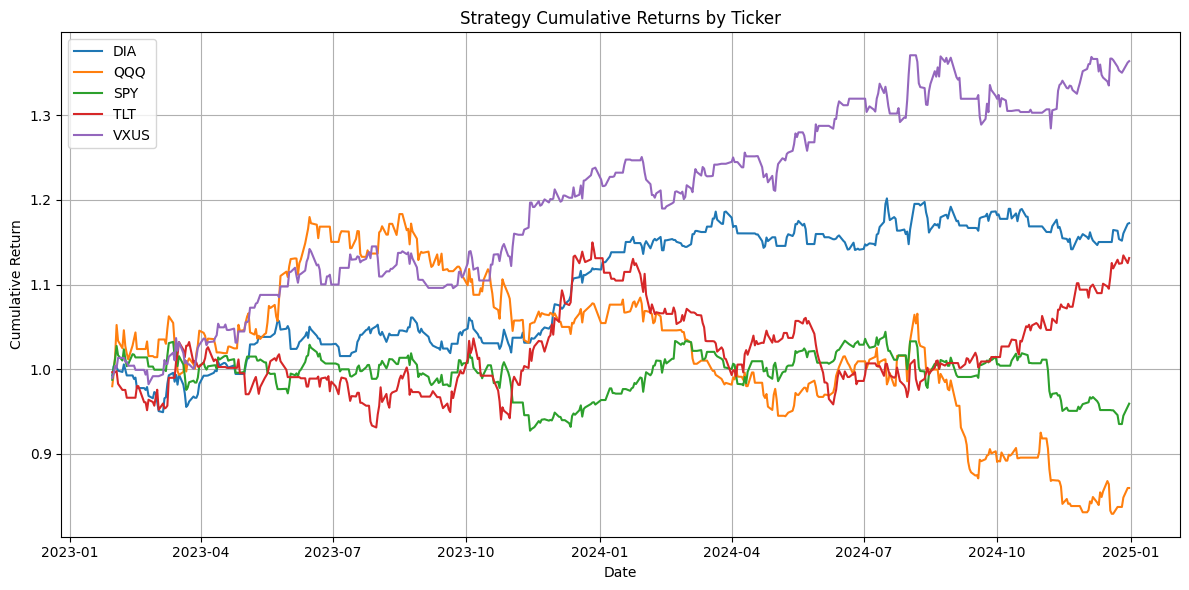

In [20]:
results = backtest_by_ticker(df_working)


In [25]:

def backtest_vs_market(df, label_col="Label", return_col="Return", ticker_col="Ticker", date_col="Date"):
    """
    Backtests strategy per ticker and compares it to actual market performance.
    Prints a summary and generates a separate plot for each ticker.
    """
    df_copy = df.copy()
    df_copy.sort_values([ticker_col, date_col], inplace=True)

    tickers = df_copy[ticker_col].unique()

    for ticker in tickers:
        df_t = df_copy[df_copy[ticker_col] == ticker].copy()

        # Strategy logic
        df_t["position"] = df_t[label_col].shift(1)
        df_t["strategy_returns"] = df_t["position"] * df_t[return_col]

        # Cumulative returns
        df_t["cumulative_market"] = (1 + df_t[return_col]).cumprod()
        df_t["cumulative_strategy"] = (1 + df_t["strategy_returns"]).cumprod()

        # Metrics
        strategy_return = df_t["cumulative_strategy"].iloc[-1] - 1
        market_return = df_t["cumulative_market"].iloc[-1] - 1
        hit_rate = (df_t["strategy_returns"] > 0).mean()

        # Print summary
        print(f"\n📈 Ticker: {ticker}")
        print(f"Strategy Total Return: {strategy_return:.2%}")
        print(f"Market Total Return:   {market_return:.2%}")
        print(f"Hit Rate:              {hit_rate:.2%}")

        # Plot
        plt.figure(figsize=(10, 5))
        plt.plot(df_t[date_col], df_t["cumulative_market"], linestyle="--", label="Market", color="gray")
        plt.plot(df_t[date_col], df_t["cumulative_strategy"], label="Strategy", color="blue")
        plt.title(f"Cumulative Returns – {ticker}")
        plt.xlabel("Date")
        plt.ylabel("Cumulative Return")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()




📈 Ticker: DIA
Strategy Total Return: 17.25%
Market Total Return:   29.96%
Hit Rate:              38.97%


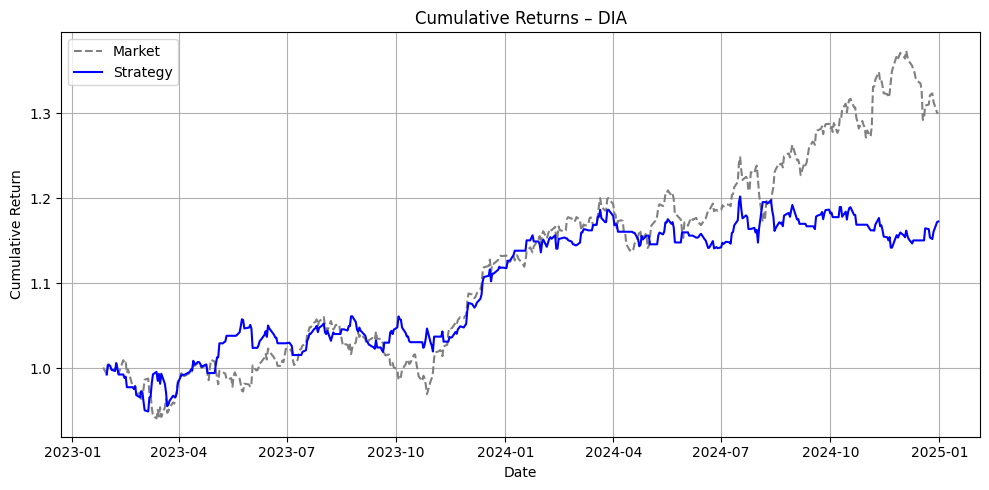


📈 Ticker: QQQ
Strategy Total Return: -14.05%
Market Total Return:   76.53%
Hit Rate:              36.70%


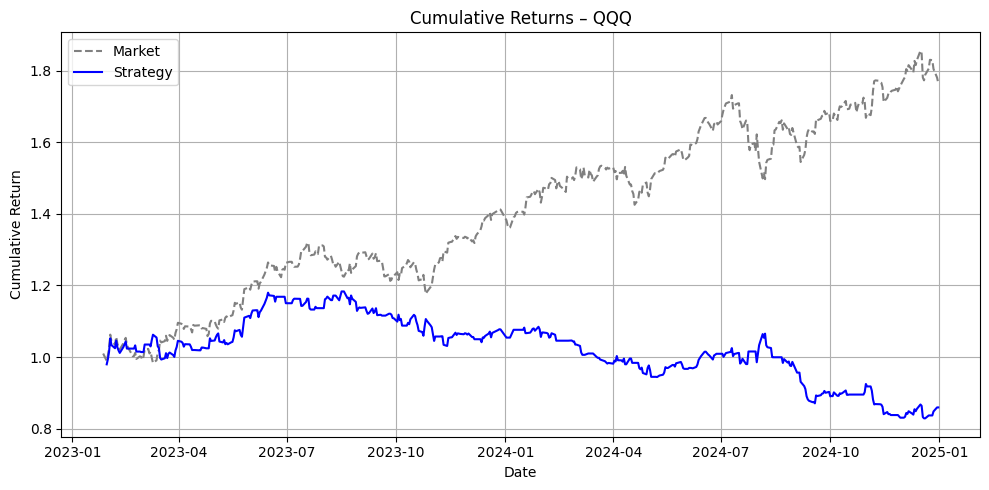


📈 Ticker: SPY
Strategy Total Return: -4.08%
Market Total Return:   48.89%
Hit Rate:              39.38%


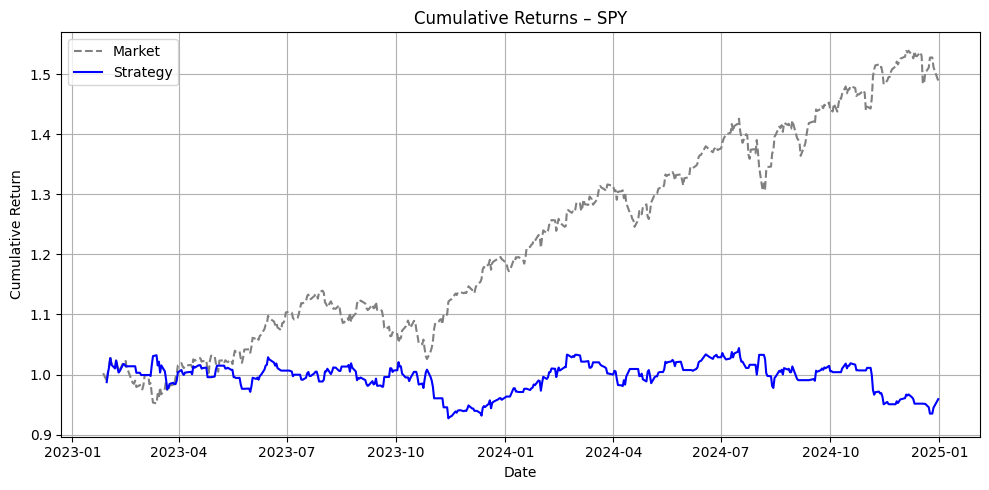


📈 Ticker: TLT
Strategy Total Return: 13.13%
Market Total Return:   -12.06%
Hit Rate:              38.14%


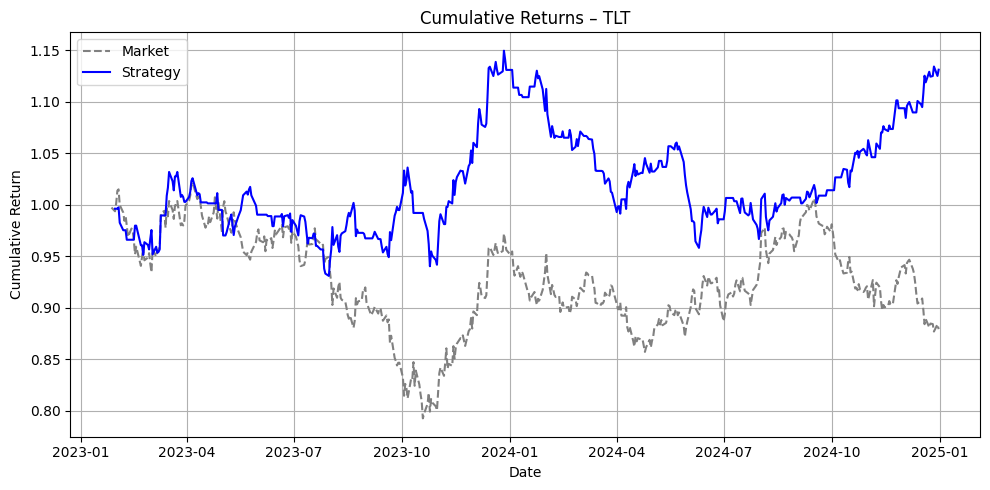


📈 Ticker: VXUS
Strategy Total Return: 36.40%
Market Total Return:   11.15%
Hit Rate:              39.79%


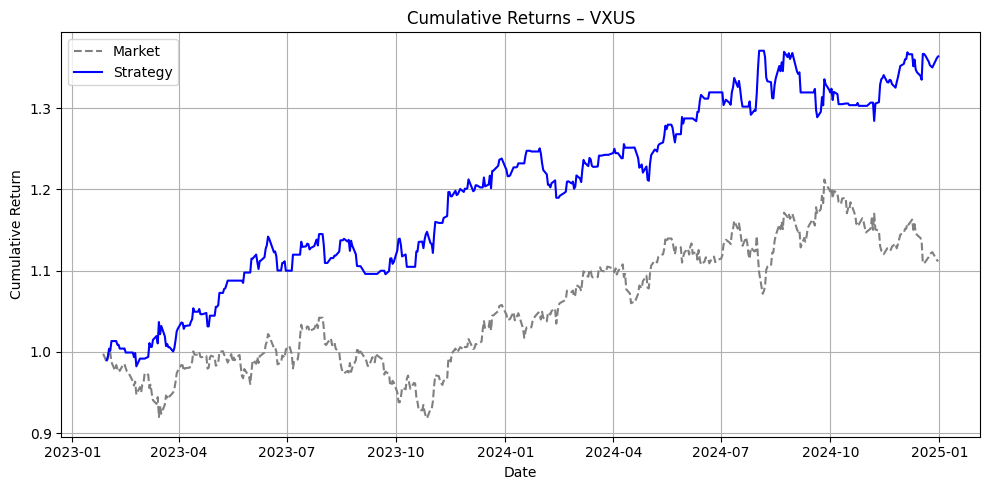

In [26]:
results_2 = backtest_vs_market(df_working)
